Zadanie polega na stworzeniu klasyfikatora obrazków działającego na 50 klasach z różnymi przedmiotami/zwierzętami itp. Zbiór treningowy podzielony na odpowiednie podfoldery z klasami oraz zbiór testowy - bez podziału. Zbiór treningowy jest przygotowany w taki sposób by można go było łatwo załadować za pomocą klasy torchvision.ImageFolder wywołując np:
trainset = ImageFolder("data/train/", transform=train_transform)
Wówczas wszystkie przykłady zostaną przypisane do odpowiedniej klasy w zależności od tego w jakim podfolderze się znajdowały.
Jako że dane są bardzo duże to umieściłem je na OneDrive:
(train.zip i test_all.zip)

W ramach rozwiązania, proszę oddać przez teamsy plik archiwum .zip z kodem (w formie notebooka, lub skryptu/skryptów .py) oraz plikiem .csv z predykcjami na zbiorze testowym. BEZ dodatkowych podfolderów i BEZ danych. W ramach predykcji proszę zapisać tym razem dwie kolumny (bez nagłówków):
Pierwszą kolumnę z nazwami plików testowych (uwaga pliki nazywają się np. 850043533599308.JPEG a nie 850043533599308.jpeg, 850043533599308.jpg czy 850043533599308). Proszę zwrócić na to uwagę bo mój skrypt ewaluacyjny inaczej nie zadziała.
Drugą kolumnę z wartościami oznaczającą predykcję numeru klasy. Klasy ponumerowane są zgodnie z numeracją ze zbioru treningowego (alfabetycznie startując od zera). Po utworzeniu datasetu w oparciu o ImageFolder klasy powinny się tak przypisać autoamtycznie - mogą to państwo sprawdzić wywołując trainset.classes.

Bardzo proszę nazywać wszystkie przesyłane pliki nazwiskami autorów (najlepiej alfabetycznie). Wyszukiwanie kto podpisał się "predictions.csv", a kto projekt_2.ipynb jest uciążliwe.
Końcowe wyniki obliczał będę w oparciu o zwykłe accuracy (klasy są zbilansowane).
Uwaga: W zadaniu proszę nie wykorzystywać gotowych architektur o których wspominałem na zajęciach. Proszę też nie kopiować gotowych fragmentów (np. bloki resnetowe itp). Ostatnie laboratorium poświęcone będzie dokładnie temu zagadnieniu. Takie rozwiązania nie będą oceniane

W MS Teams przydzieliłem zadanie wszystkim uczestnikom, ale bardzo proszę żeby tylko jeden (dowolny) członek zespołu je zwrócił (proszę się dogadać).
W razie pytań zapraszam do korespondencji lub na konsultacje.


In [19]:
# utils 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# torch imports
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Import datasetów

In [21]:
transform = transforms.Compose([
     transforms.Resize((64, 64)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

batch_size = 32
train_data_path = './data/train'
test_data_path = './data/test_all'

train_dataset = ImageFolder(root=train_data_path, transform=transform)
test_dataset = ImageFolder(root=train_data_path, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# classes in the dataset
folders = sorted(os.listdir(train_data_path))
classes = {index: value for index, value in enumerate(folders)}

print(classes)


{0: 'acoustic', 1: 'antenna', 2: 'bacteria', 3: 'battery', 4: 'bean', 5: 'beetle', 6: 'bicycle', 7: 'birch', 8: 'bird', 9: 'bomb', 10: 'bread', 11: 'bridge', 12: 'camera', 13: 'carbon', 14: 'cat', 15: 'corn', 16: 'crab', 17: 'crocodilian', 18: 'echinoderm', 19: 'egg', 20: 'elephant', 21: 'fish', 22: 'flower', 23: 'frog', 24: 'fungus', 25: 'gauge', 26: 'hammer', 27: 'icecream', 28: 'kangaroo', 29: 'memorial', 30: 'monkey', 31: 'motor', 32: 'nest', 33: 'palm', 34: 'pizza', 35: 'pot', 36: 'printer', 37: 'saw', 38: 'snake', 39: 'spice', 40: 'spider', 41: 'spoon', 42: 'squash', 43: 'swine', 44: 'tea', 45: 'tomato', 46: 'towel', 47: 'truck', 48: 'turtle', 49: 'worm'}


Przykładowe obrazy ze zbioru testowego

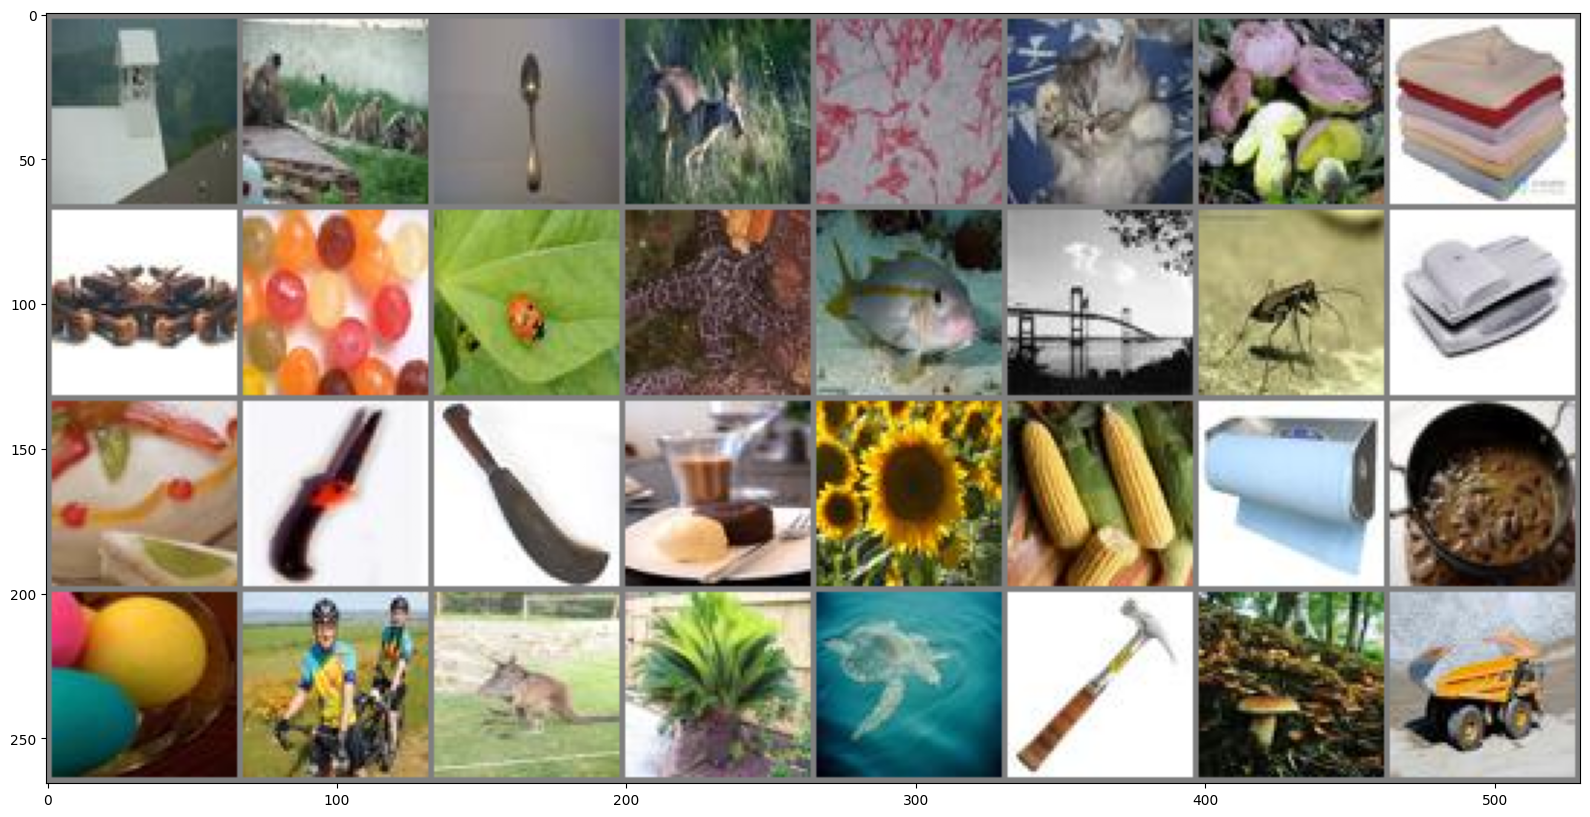

acoustic monkey spoon kangaroo bacteria   cat fungus towel spice icecream beetle echinoderm  fish bridge beetle antenna icecream   saw   saw icecream flower  corn towel  bean   egg bicycle kangaroo  palm turtle hammer fungus truck


In [23]:
plt.figure(figsize = (20,10))

# get some random training images
images, labels = next(iter(train_loader))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j].item()] for j in range(batch_size)))